In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#READING DATA TEXT
df= pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_230318.txt', header=0) 

In [7]:
#SETTING COLUMNS NAMES
df.rename(columns={"EXITS                                                               " : "exits"}, inplace=True)
df.rename(columns={"STATION": "station"}, inplace=True)
df.rename(columns={"ENTRIES" : "entries"}, inplace=True)
df.rename(columns={"TIME" : "time"}, inplace=True)
df.rename(columns={"DATE" : "date"}, inplace=True)

In [8]:
df.dtypes

C/A         object
UNIT        object
SCP         object
station     object
LINENAME    object
DIVISION    object
date        object
time        object
DESC        object
entries      int64
exits        int64
dtype: object

In [9]:
df

,C/A,UNIT,SCP,station,LINENAME,DIVISION,date,time,DESC,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/11/2023,03:00:00,REGULAR,7841834,2793522
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/11/2023,07:00:00,REGULAR,7841838,2793529
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/11/2023,11:00:00,REGULAR,7841864,2793593
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/11/2023,15:00:00,REGULAR,7841929,2793634
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/11/2023,19:00:00,REGULAR,7842065,2793683
...,...,...,...,...,...,...,...,...,...,...,...
207877,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/17/2023,05:00:00,REGULAR,0,1117
207878,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/17/2023,09:00:00,REGULAR,0,1117
207879,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/17/2023,13:00:00,REGULAR,0,1117
207880,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/17/2023,17:00:00,REGULAR,0,1117


In [10]:
df['dates'] = pd.to_datetime(df['date'])
df.dtypes

C/A                 object
UNIT                object
SCP                 object
station             object
LINENAME            object
DIVISION            object
date                object
time                object
DESC                object
entries              int64
exits                int64
dates       datetime64[ns]
dtype: object

In [11]:
df['weekday'] = df['dates'].dt.day_name()
df

,C/A,UNIT,SCP,station,LINENAME,DIVISION,date,time,DESC,entries,exits,dates,weekday
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/11/2023,03:00:00,REGULAR,7841834,2793522,2023-03-11,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/11/2023,07:00:00,REGULAR,7841838,2793529,2023-03-11,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/11/2023,11:00:00,REGULAR,7841864,2793593,2023-03-11,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/11/2023,15:00:00,REGULAR,7841929,2793634,2023-03-11,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/11/2023,19:00:00,REGULAR,7842065,2793683,2023-03-11,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207877,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/17/2023,05:00:00,REGULAR,0,1117,2023-03-17,Friday
207878,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/17/2023,09:00:00,REGULAR,0,1117,2023-03-17,Friday
207879,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/17/2023,13:00:00,REGULAR,0,1117,2023-03-17,Friday
207880,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/17/2023,17:00:00,REGULAR,0,1117,2023-03-17,Friday


In [12]:
df["turnstile"] = df["C/A"] + "-" + df["UNIT"] + "-" + df["SCP"]
#df["time"] = pd.to_datetime(df["DATE"] + " " + df["TIME"], format="%m/%d/%Y %H:%M:%S")
df

,C/A,UNIT,SCP,station,LINENAME,DIVISION,date,time,DESC,entries,exits,dates,weekday,turnstile
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/11/2023,03:00:00,REGULAR,7841834,2793522,2023-03-11,Saturday,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/11/2023,07:00:00,REGULAR,7841838,2793529,2023-03-11,Saturday,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/11/2023,11:00:00,REGULAR,7841864,2793593,2023-03-11,Saturday,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/11/2023,15:00:00,REGULAR,7841929,2793634,2023-03-11,Saturday,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/11/2023,19:00:00,REGULAR,7842065,2793683,2023-03-11,Saturday,A002-R051-02-00-00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207877,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/17/2023,05:00:00,REGULAR,0,1117,2023-03-17,Friday,TRAM2-R469-00-05-01
207878,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/17/2023,09:00:00,REGULAR,0,1117,2023-03-17,Friday,TRAM2-R469-00-05-01
207879,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/17/2023,13:00:00,REGULAR,0,1117,2023-03-17,Friday,TRAM2-R469-00-05-01
207880,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/17/2023,17:00:00,REGULAR,0,1117,2023-03-17,Friday,TRAM2-R469-00-05-01


In [13]:
df2=df.loc[df['entries'] > 0 , ["turnstile","time","station","entries","exits","weekday"]] #DROP ENTRIES COLUMNS < 0
df2

,turnstile,time,station,entries,exits,weekday
0,A002-R051-02-00-00,03:00:00,59 ST,7841834,2793522,Saturday
1,A002-R051-02-00-00,07:00:00,59 ST,7841838,2793529,Saturday
2,A002-R051-02-00-00,11:00:00,59 ST,7841864,2793593,Saturday
3,A002-R051-02-00-00,15:00:00,59 ST,7841929,2793634,Saturday
4,A002-R051-02-00-00,19:00:00,59 ST,7842065,2793683,Saturday
...,...,...,...,...,...,...
207835,TRAM2-R469-00-05-00,05:00:00,RIT-ROOSEVELT,354778,0,Friday
207836,TRAM2-R469-00-05-00,09:00:00,RIT-ROOSEVELT,354796,0,Friday
207837,TRAM2-R469-00-05-00,13:00:00,RIT-ROOSEVELT,354827,0,Friday
207838,TRAM2-R469-00-05-00,17:00:00,RIT-ROOSEVELT,354853,0,Friday


In [14]:
df2["entries_diff"] = df2["entries"].diff().fillna(0)
df2["exits_diff"] = df2["exits"].diff().fillna(0)
df2

,turnstile,time,station,entries,exits,weekday,entries_diff,exits_diff
0,A002-R051-02-00-00,03:00:00,59 ST,7841834,2793522,Saturday,0.0,0.0
1,A002-R051-02-00-00,07:00:00,59 ST,7841838,2793529,Saturday,4.0,7.0
2,A002-R051-02-00-00,11:00:00,59 ST,7841864,2793593,Saturday,26.0,64.0
3,A002-R051-02-00-00,15:00:00,59 ST,7841929,2793634,Saturday,65.0,41.0
4,A002-R051-02-00-00,19:00:00,59 ST,7842065,2793683,Saturday,136.0,49.0
...,...,...,...,...,...,...,...,...
207835,TRAM2-R469-00-05-00,05:00:00,RIT-ROOSEVELT,354778,0,Friday,0.0,0.0
207836,TRAM2-R469-00-05-00,09:00:00,RIT-ROOSEVELT,354796,0,Friday,18.0,0.0
207837,TRAM2-R469-00-05-00,13:00:00,RIT-ROOSEVELT,354827,0,Friday,31.0,0.0
207838,TRAM2-R469-00-05-00,17:00:00,RIT-ROOSEVELT,354853,0,Friday,26.0,0.0


In [15]:
#ent_diff & exts_diff columns turn float to obj
df2["entries_diff"]=df2["entries_diff"].astype(float)
df2["exits_diff"]=df2["exits_diff"].astype(float)

In [16]:
#"""1 kişi ort 4 saniyede geçiş yapar olarak hesapladım. 4 saatte yaklaşık 3500 kişi. bu değeri maks değer kabul edip
#üstünde olan değerleri aykırı değer varsayıyorum""" çıkış için 2 saniyede 1 kişi hesapladım ve 7200 maks sayısını buldum


df3= df2.loc[(df2["entries_diff"] >=0) & (df2["entries_diff"] < 3500) & (df2["exits_diff"] > 0) & (df2["exits_diff"] < 7200)]
df3

,turnstile,time,station,entries,exits,weekday,entries_diff,exits_diff
1,A002-R051-02-00-00,07:00:00,59 ST,7841838,2793529,Saturday,4.0,7.0
2,A002-R051-02-00-00,11:00:00,59 ST,7841864,2793593,Saturday,26.0,64.0
3,A002-R051-02-00-00,15:00:00,59 ST,7841929,2793634,Saturday,65.0,41.0
4,A002-R051-02-00-00,19:00:00,59 ST,7842065,2793683,Saturday,136.0,49.0
5,A002-R051-02-00-00,23:00:00,59 ST,7842124,2793709,Saturday,59.0,26.0
...,...,...,...,...,...,...,...,...
207792,TRAM2-R469-00-03-01,01:00:00,RIT-ROOSEVELT,3280282,407657,Friday,43.0,3.0
207793,TRAM2-R469-00-03-01,05:00:00,RIT-ROOSEVELT,3280282,407664,Friday,0.0,7.0
207794,TRAM2-R469-00-03-01,09:00:00,RIT-ROOSEVELT,3280291,407667,Friday,9.0,3.0
207796,TRAM2-R469-00-03-01,17:00:00,RIT-ROOSEVELT,3280437,407669,Friday,93.0,2.0


In [17]:
df3.dtypes

turnstile        object
time             object
station          object
entries           int64
exits             int64
weekday          object
entries_diff    float64
exits_diff      float64
dtype: object

In [18]:
station_entries = df3.groupby(["weekday"])["entries_diff"].count()
station_entries


weekday
Friday       25750
Monday       25574
Saturday     20271
Sunday       21954
Thursday     25834
Tuesday      25774
Wednesday    25902
Name: entries_diff, dtype: int64

<Axes: xlabel='weekday', ylabel='entries_diff'>

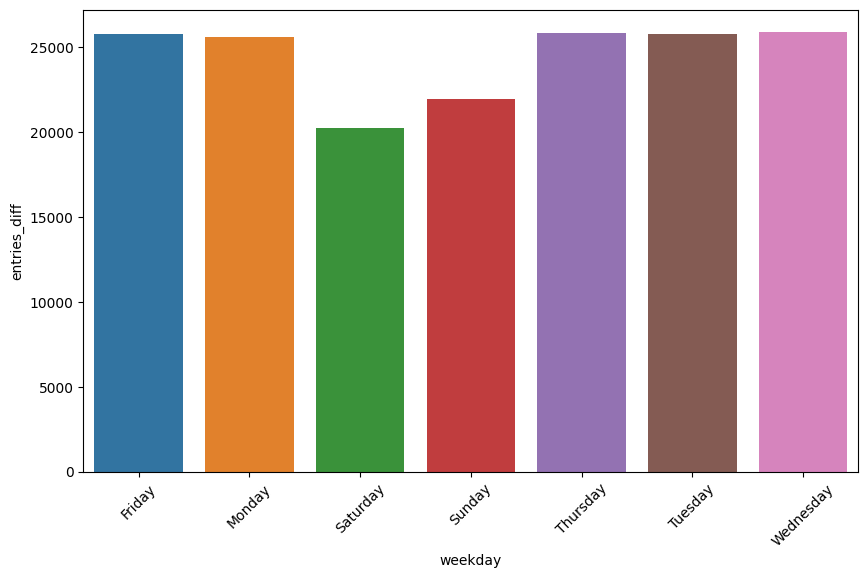

In [19]:
plt.figure(figsize = (10,6))
plt.xticks(rotation=45)
sns.barplot(x=station_entries.index , y=station_entries)

In [20]:
df3["time2"] = df3["time"].astype(str).str[:2]
df3["time2"].astype(int) 

C:\Users\bemos\AppData\Local\Temp\ipykernel_12968\2350251446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["time2"] = df3["time"].astype(str).str[:2]


1          7
2         11
3         15
4         19
5         23
          ..
207792     1
207793     5
207794     9
207796    17
207797    21
Name: time2, Length: 171059, dtype: int32

In [21]:
crowded_hourly = df3.groupby(["time2"])["entries_diff"].count().sort_values(ascending=True)
crowded_hourly


time2
03      525
02      821
06     1128
22     1179
10     1183
18     1208
14     1210
07     2766
23     2836
15     2883
19     2896
11     2924
01     8343
05     9253
13    10216
09    10278
21    10279
17    10280
00    13229
04    14599
08    15715
12    15716
16    15787
20    15805
Name: entries_diff, dtype: int64

In [27]:
crowded_hourly2 = df3[df3["time2"].between("00","03")]
group_by_time04 =(crowded_hourly2.groupby(["time2"])["entries_diff"].count().sort_values(ascending=True)).sum()
crowded_hourly3 = df3[df3["time2"].between("04","07")]
group_by_time48 =(crowded_hourly3.groupby(["time2"])["entries_diff"].count().sort_values(ascending=True)).sum()
crowded_hourly4 = df3[df3["time2"].between("08","11")]
group_by_time812 =(crowded_hourly4.groupby(["time2"])["entries_diff"].count().sort_values(ascending=True)).sum()
crowded_hourly5 = df3[df3["time2"].between("12","15")]
group_by_time1216=(crowded_hourly5.groupby(["time2"])["entries_diff"].count().sort_values(ascending=True)).sum()
crowded_hourly6 = df3[df3["time2"].between("16","19")]
group_by_time1620 =(crowded_hourly6.groupby(["time2"])["entries_diff"].count().sort_values(ascending=True)).sum()
crowded_hourly7 = df3[df3["time2"].between("20","23")]
group_by_time2024 =(crowded_hourly7.groupby(["time2"])["entries_diff"].count().sort_values(ascending=True)).sum()


result={"col1" : ["00-04","04-08","08-12","12-16","16-20","20-24"],
                    "col2" :[group_by_time04,group_by_time48,group_by_time812,group_by_time1216,group_by_time1620,group_by_time2024]}
result
result2 =pd.DataFrame(data=result, index=[0,1,2,3,4,5])
result2

,col1,col2
0,00-04,22918
1,04-08,27746
2,08-12,30100
3,12-16,30025
4,16-20,30171
5,20-24,30099


<Axes: xlabel='col1', ylabel='col2'>

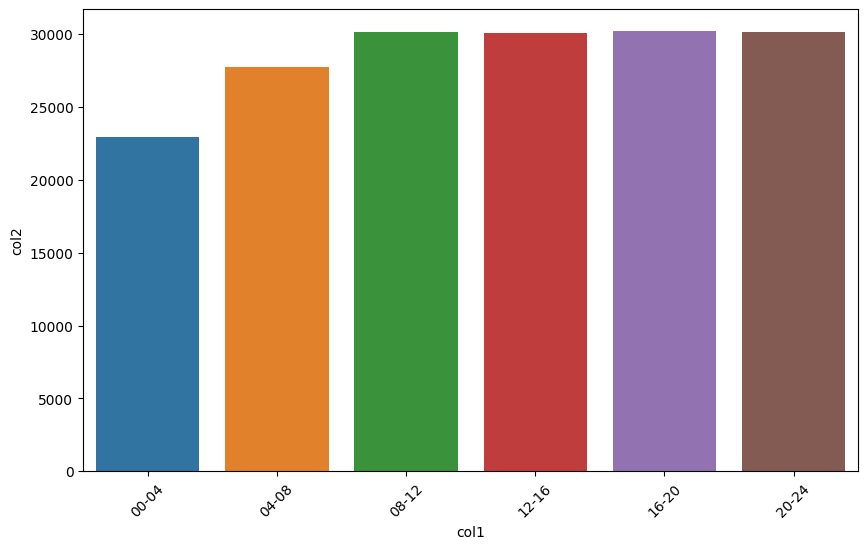

In [28]:
plt.figure(figsize = (10,6))
plt.xticks(rotation=45)
sns.barplot(x=result2["col1"] , y=result2["col2"])

In [ ]:
hourly_group_day = pd.(df3["time2"] , bins=["00,04,08,12,16,20"])
hourly_group_day

SyntaxError: invalid syntax (3756921092.py, line 1)

In [ ]:
df3["time2"] = df3["time"].astype(str).str[:2]


C:\Users\bemos\AppData\Local\Temp\ipykernel_11300\1061786404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["time2"] = df3["time"].astype(str).str[:2]
